<a href="https://colab.research.google.com/github/9terry-student/pytorch/blob/main/self_attention_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Self-Attention Visualization

# Transformer self-attention 구조를 이해하기 위한 실습
# 랜덤 임베딩을 사용해 attention 관계를 시각화

import torch
import torch.nn.functional as F

class SelfAttention(torch.nn.Module):
  def __init__(self,embed_dim):
    super().__init__()
    self.embed_dim=embed_dim

    # 입력을 Q,K,V로 선형 변환
    self.query=torch.nn.Linear(embed_dim,embed_dim)
    self.key  =torch.nn.Linear(embed_dim,embed_dim)
    self.value=torch.nn.Linear(embed_dim,embed_dim)

  def forward(self,x):
    """
    x:(batch_size,seq_len,embed_dim)
    """

    # Q,K,V 생성
    Q=self.query(x)  #(B,S,D) # B:문장 개수
    K=self.key(x)    #(B,S,D) # S:단어 개수
    V=self.value(x)  #(B,S,D) # D:단어당 숫자 수

    # Attention score 계산
    scores=torch.matmul(Q,K.transpose(-2,-1))
    #(B,S,S)

    # 스케일링
    scores=scores/(self.embed_dim**0.5)

    # Softmax -> 비율
    attention_weights=F.softmax(scores,dim=-1)

    # Value 가중합
    output=torch.matmul(attention_weights,V)

    return output,attention_weights

In [28]:
# 가짜 문장 (토큰)
tokens=["I","went","to","the","hospital"]

S=len(tokens)
D=8   # embed_dim
B=1

# 각 단어를 D차원 벡터로 (랜덤)
x=torch.rand(B,S,D)

attention=SelfAttention(D)
output,weights=attention(x)

weights.shape   #(1,S,S)

attn=weights[0].detach().numpy()

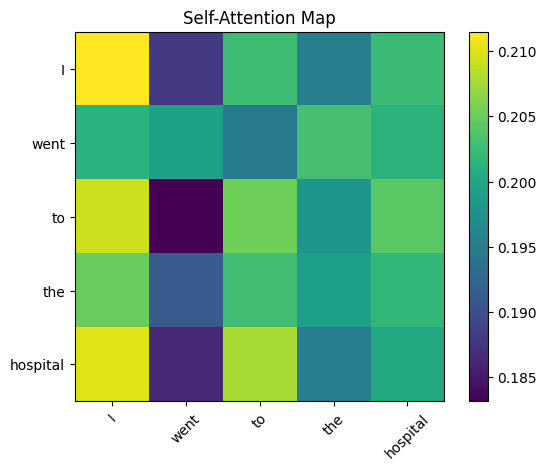

In [29]:
# 시각화
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(attn)
plt.colorbar()

plt.xticks(range(S),tokens,rotation=45)
plt.yticks(range(S),tokens)

plt.title("Self-Attention Map")
plt.show()

